In [1]:
from mpl_toolkits import mplot3d

import numpy as np

import matplotlib.pyplot as plt

import matplotlib

plt.rcParams["font.size"] = 15
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.lines import Line2D

In [2]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.lines import Line2D

In [3]:
import pandas as pd

from collections import Counter

import itertools

In [4]:
import sympy as sym

In [5]:
import os

In [6]:
os.chdir("/Users/glynatsi/rsc/reactive-two-bits/")

In [7]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader("main", "src/main.py").load_module()

from main import *

In [8]:
eq = SourceFileLoader("eq", "src/numerical_equilibria_n_bit_vs_n_bit.py").load_module()

from eq import *

In [9]:
colors = ["tab:orange", "tab:green", "tab:green"]

### Numerical Nash

In [10]:
import glob

In [11]:
files = glob.glob("data/prisoners_dilemma_two_bit_reactive/*csv")

In [12]:
len(files)

1000

In [13]:
columns = (
    ["", "ID"]
    + [f"p{i+1}" for i in range(16)]
    + ["label", "Sp", "Sq", "condition A", "condition B", "c", "b"]
)

dfs = [pd.read_csv(file, index_col=0, names=columns) for file in files]

df = pd.concat(dfs)

In [14]:
df.head()

,ID,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p14,p15,p16,label,Sp,Sq,condition A,condition B,c,b
,,,,,,,,,,,,,,,,,,,,,
0,285,1,0.05656,1,0.05656,0.61041,0.56342,0.61041,0.56342,1,...,0.56342,0.61041,0.56342,N0,0.6,0.607078,False,False,0.6,0.1
1,285,1,0.05656,1,0.05656,0.61041,0.56342,0.61041,0.56342,1,...,0.56342,0.61041,0.56342,N1,0.6,0.501163,True,True,0.6,0.1
2,285,1,0.05656,1,0.05656,0.61041,0.56342,0.61041,0.56342,1,...,0.56342,0.61041,0.56342,N2,0.6,0.465244,True,True,0.6,0.1
3,285,1,0.05656,1,0.05656,0.61041,0.56342,0.61041,0.56342,1,...,0.56342,0.61041,0.56342,N3,0.6,0.421982,True,True,0.6,0.1
4,285,1,0.05656,1,0.05656,0.61041,0.56342,0.61041,0.56342,1,...,0.56342,0.61041,0.56342,N4,0.6,0.607078,False,False,0.6,0.1


In [19]:
10 ** 4

10000

In [15]:
def seperate_equilibria_and_non(df):
    per_player = df.groupby('ID')['condition A'].all()

    eq_players_ID = per_player[per_player == True].index

    noneq_players_ID = per_player[per_player == False].index
    
    return df[df['ID'].isin(eq_players_ID)], df[df['ID'].isin(noneq_players_ID)]

In [16]:
df['ID'].nunique()

1000

In [17]:
eq, noneq = seperate_equilibria_and_non(df)

In [18]:
eq['ID'].nunique(), noneq['ID'].nunique()

(422, 578)

In [19]:
def conditition_one(p2, p4, b, c):
    return p4 < 1 - (c / b)

def conditition_two(p2, p4, b, c):
    return p2 < p4

def conditition_three(p3, b, c):
    return p3 < 1

def condition_four(p2, p4, b, c):
    return  1 + p2 < (b / c) + (p4 * (c - b)) / c

def nash_conditions(p, b, c):
    p1, p2, p3, p4 = p
    
    c1 = conditition_one(p2, p4, b, c)
    c2 = conditition_two(p2, p4, b, c)
    c3 = conditition_three(p3, b, c)
    c4 = condition_four(p2, p4, b, c)
    
    return {"c1": c1, "c2": c2, "c3": c3, "c4": c4}


In [46]:
def N544(p):
    _, p_2, p_3, p_4 = p
    return (
        2 * p_2 ** 2 * p_3 ** 2 * p_4
        - p_2 ** 2 * p_3 ** 2
        - p_2 ** 2 * p_3 * p_4
        - 4 * p_2 * p_3 ** 2 * p_4 ** 2
        + p_2 * p_3 ** 2 * p_4
        + 2 * p_2 * p_3 * p_4 ** 2
        - p_2 * p_3 * p_4
        + p_2 * p_3
        - p_2 * p_4
        + 2 * p_3 ** 2 * p_4 ** 3
        - p_3 * p_4 ** 3
        - p_3 * p_4 ** 2
        + p_3 * p_4
        - p_3
        - 2 * p_4 ** 3
        + 2 * p_4 ** 2
        - p_4
        + 1
    ) / (
        p_2 ** 2 * p_3 ** 2
        + p_2 ** 2 * p_3 * p_4
        - p_2 * p_3 ** 2 * p_4
        - 3 * p_2 * p_3 * p_4 ** 2
        - p_2 * p_3 * p_4
        - p_2 * p_3
        + p_2 * p_4
        + 2 * p_3 * p_4 ** 3
        + p_3 * p_4 ** 2
        + p_3 * p_4
        + p_3
        - 3 * p_4 ** 2
        - p_4
        - 1
    )

def N13107(p):
    return p[1] + p[2] -  3 / 2

def N0(p):
    return 2 * p[3] - 1

In [20]:
for i, row in noneq[['p1', 'p2', 'p5', 'p6']].drop_duplicates().iterrows():
    p = row[['p1', 'p2', 'p5', 'p6']]
    
    check = nash_conditions(p, 2, 1)
    
    assert all(check.values()) == False

In [21]:
outside = 0
for i, row in eq[['p1', 'p2', 'p5', 'p6']].drop_duplicates().iterrows():
    p = row[['p1', 'p2', 'p5', 'p6']]
    
    check = all(nash_conditions(p, 2, 1).values())
    
    if check == False:
        outside += 1

In [22]:
outside / eq['ID'].nunique()

0.7037914691943128

#### The pure set of strategies we need to check 

In [23]:
groups = noneq[noneq['condition A'] == False].groupby('ID')

In [24]:
sets, ids = [], []

for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())

In [117]:
flat_list = [item for sublist in [s for s in sets if ('N0' not in s)] for item in sublist]

counter = Counter(flat_list)

In [118]:
len([s for s in sets if ('N0' not in s)])

131

In [119]:
max(counter.values())

119

In [126]:
[key for key, values in zip(counter.keys(), counter.values()) if values == 119]

['N8897',
 'N8898',
 'N8899',
 'N8901',
 'N8902',
 'N8903',
 'N8905',
 'N8906',
 'N8907',
 'N8909',
 'N8910',
 'N8911',
 'N8912',
 'N8913',
 'N8914',
 'N8915',
 'N8916',
 'N8917',
 'N8918',
 'N8919',
 'N8920',
 'N8921',
 'N8922',
 'N8923',
 'N8924',
 'N8925',
 'N8926',
 'N8927',
 'N8928',
 'N8929',
 'N8930',
 'N8931',
 'N8932',
 'N8933',
 'N8934',
 'N8935',
 'N8936',
 'N8937',
 'N8938',
 'N8939',
 'N8940',
 'N8941',
 'N8942',
 'N8943',
 'N8944',
 'N8945',
 'N8946',
 'N8947',
 'N8948',
 'N8949',
 'N8950',
 'N8951',
 'N8952',
 'N8953',
 'N8954',
 'N8955',
 'N8956',
 'N8957',
 'N8958',
 'N8959',
 'N9153',
 'N9154',
 'N9155',
 'N9157',
 'N9158',
 'N9159',
 'N9161',
 'N9162',
 'N9163',
 'N9165',
 'N9166',
 'N9167',
 'N9168',
 'N9169',
 'N9170',
 'N9171',
 'N9172',
 'N9173',
 'N9174',
 'N9175',
 'N9176',
 'N9177',
 'N9178',
 'N9179',
 'N9180',
 'N9181',
 'N9182',
 'N9183',
 'N9184',
 'N9185',
 'N9186',
 'N9187',
 'N9188',
 'N9189',
 'N9190',
 'N9191',
 'N9192',
 'N9193',
 'N9194',
 'N9195',


In [135]:
deterministic_strategies[8898]

(0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0)

In [43]:
flat_list = [item for sublist in [s for s in sets if ('N0' not in s) and ('N8897' not in s)] for item in sublist]

counter = Counter(flat_list)

In [44]:
max(counter.values())

12

In [48]:
flat_list

['N28',
 'N29',
 'N30',
 'N31',
 'N92',
 'N93',
 'N94',
 'N95',
 'N156',
 'N157',
 'N158',
 'N159',
 'N207',
 'N220',
 'N221',
 'N222',
 'N223',
 'N224',
 'N225',
 'N226',
 'N227',
 'N228',
 'N229',
 'N230',
 'N231',
 'N232',
 'N233',
 'N234',
 'N235',
 'N236',
 'N237',
 'N238',
 'N239',
 'N242',
 'N244',
 'N245',
 'N246',
 'N247',
 'N248',
 'N249',
 'N250',
 'N251',
 'N252',
 'N253',
 'N254',
 'N255',
 'N284',
 'N285',
 'N286',
 'N287',
 'N348',
 'N349',
 'N350',
 'N351',
 'N412',
 'N413',
 'N414',
 'N415',
 'N463',
 'N476',
 'N477',
 'N478',
 'N479',
 'N480',
 'N482',
 'N483',
 'N484',
 'N485',
 'N486',
 'N487',
 'N488',
 'N489',
 'N490',
 'N491',
 'N492',
 'N493',
 'N494',
 'N495',
 'N500',
 'N501',
 'N502',
 'N503',
 'N504',
 'N505',
 'N506',
 'N507',
 'N508',
 'N509',
 'N510',
 'N511',
 'N719',
 'N732',
 'N733',
 'N734',
 'N735',
 'N736',
 'N738',
 'N739',
 'N740',
 'N741',
 'N742',
 'N743',
 'N744',
 'N745',
 'N746',
 'N747',
 'N748',
 'N749',
 'N750',
 'N751',
 'N756',
 'N757',


**With Alternator**

In [38]:
len([s for s in sets if ('N0' not in s) and ("N13107" not in s)])

46

In [41]:
flat_list = [item for sublist in [s for s in sets if ('N0' not in s) and ("N13107" not in s)] for item in sublist]

counter = Counter(flat_list)

In [42]:
max(counter.values())

34

In [30]:
remaining = [s for s in sets if ('N0' not in s) and ('N8897' not in s)]

In [31]:
len(remaining)

12

In [32]:
flat_list = [item for sublist in remaining for item in sublist]

counter = Counter(flat_list)

In [33]:
max(counter.values())

12

In [131]:
[key for key, values in zip(counter.keys(), counter.values()) if values == 12]

['N252',
 'N253',
 'N254',
 'N255',
 'N508',
 'N509',
 'N510',
 'N511',
 'N1276',
 'N1277',
 'N1278',
 'N1279',
 'N1532',
 'N1533',
 'N1534',
 'N1535',
 'N2300',
 'N2301',
 'N2302',
 'N2303',
 'N2556',
 'N2557',
 'N2558',
 'N2559',
 'N3324',
 'N3325',
 'N3326',
 'N3327',
 'N3580',
 'N3581',
 'N3582',
 'N3583',
 'N4348',
 'N4349',
 'N4350',
 'N4351',
 'N4604',
 'N4605',
 'N4606',
 'N4607',
 'N5372',
 'N5373',
 'N5374',
 'N5375',
 'N5628',
 'N5629',
 'N5630',
 'N5631',
 'N6396',
 'N6397',
 'N6398',
 'N6399',
 'N6652',
 'N6653',
 'N6654',
 'N6655',
 'N7420',
 'N7421',
 'N7422',
 'N7423',
 'N7676',
 'N7677',
 'N7678',
 'N7679',
 'N16636',
 'N16637',
 'N16638',
 'N16639',
 'N16892',
 'N16893',
 'N16894',
 'N16895',
 'N17660',
 'N17661',
 'N17662',
 'N17663',
 'N17916',
 'N17917',
 'N17918',
 'N17919',
 'N18172',
 'N18173',
 'N18174',
 'N18175',
 'N18428',
 'N18429',
 'N18430',
 'N18431',
 'N18684',
 'N18685',
 'N18686',
 'N18687',
 'N18940',
 'N18941',
 'N18942',
 'N18943',
 'N19708',
 'N19

In [103]:
deterministic_strategies[255]

(0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1)

In [104]:
deterministic_strategies[24575]

(0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)

In [47]:
for i, row in eq[['p1', 'p2', 'p5', 'p6']].drop_duplicates().iterrows():
    
    p = row[['p1', 'p2', 'p5', 'p6']]
    
    A = np.isclose(N13107(p), 0, atol=10 ** -4) or  N13107(p) < 0
    B = np.isclose(N0(p), 0, atol=10 ** -4) or  N0(p) < 0    
    
    assert A and B

AssertionError: 

In [86]:
deterministic_strategies = list(
    itertools.product([0, 1], repeat=2 ** (2 * 2))
    )

In [87]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4")

R, S, T, P = sym.symbols("R, S, T, P")

p_1 = 1

player = [p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4,
          p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4]

In [68]:
M = calculate_M_memory_two(deterministic_strategies[13107], player, analytical=True)

ss = invariant_distribution_analytically(M) 

In [69]:
exprN13107 = ((ss @ np.array([R, 0, 1, P] * 4))[0] - R).factor()
exprN13107

-(P*p_3 - P - R*p_2 + 2*R - p_3)/2

Cooperate if in the last round the outcome was `CD` except in the case where the second to last outcome was `CD`.
Then cooperate if cooperated in the last turn.

In [142]:
deterministic_strategies[8898]

(0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0)

In [143]:
M = calculate_M_memory_two(deterministic_strategies[8898], player, analytical=True)

ss = invariant_distribution_analytically(M) 

In [144]:
sym.Matrix([s.factor() for s in ss]).T

Matrix([[p_2*p_3/3, -p_2*(p_3 - 1)/3, p_3/3, 0, -p_3*(p_2 - 1)/3, (p_2 - 1)*(p_3 - 1)/3, -(p_3 - 1)/3, 0, p_2/3, -(p_2 - 1)/3, 0, 0, 0, 0, 0, 0]])

In [138]:
exprN8897 = ((ss @ np.array([R, 0, 1, P] * 4))[0] - R).factor()
exprN8897

(R*p_2 + R*p_3 - 3*R + 1)/3

N255 cooperates if it defected on the second to last round.

In [115]:
deterministic_strategies[255]

(0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1)

In [145]:
M = calculate_M_memory_two(deterministic_strategies[255], player, analytical=True)

ss = invariant_distribution_analytically(M) 

In [146]:
sym.Matrix([s.factor() for s in ss]).T

Matrix([[p_3*p_4/4, -p_4*(p_3 - 1)/4, p_3/4, 0, -p_3*(p_4 - 1)/4, (p_3 - 1)*(p_4 - 1)/4, -(p_3 - 1)/4, 0, p_2*p_4/4, -p_2*(p_4 - 1)/4, p_2/4, -(p_2 - 1)/4, -p_4*(p_2 - 1)/4, (p_2 - 1)*(p_4 - 1)/4, 0, 0]])

In [147]:
exprN252 = ((ss @ np.array([R, 0, 1, P] * 4))[0] - R).factor()
exprN252.factor()

-(P*p_2 - P - R*p_3 - R*p_4 + 4*R - p_2 - 1)/4

In [99]:
M = calculate_M_memory_two(deterministic_strategies[0], player, analytical=True)

ss = invariant_distribution_analytically(M) 

In [100]:
sym.Matrix([s.factor() for s in ss]).T

Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, p_4**2, -p_4*(p_4 - 1), 0, 0, -p_4*(p_4 - 1), (p_4 - 1)**2]])

In [71]:
exprN0 = ((ss @ np.array([R, 0, 1, P] * 4))[0] - R).factor()
exprN0.factor()

-P*p_4 + P - R + p_4

Thus, N0 and N13107 are enough to check for Nash.

In [72]:
exprN0.subs({R:0.6, P:0.1})

0.9*p_4 - 0.5

In [73]:
exprN252.subs({R:0.6, P:0.1})

0.225*p_2 + 0.15*p_3 + 0.15*p_4 - 0.325

In [74]:
exprN8897.subs({R:0.6, P:0.1})

0.2*p_2 + 0.2*p_3 - 0.266666666666667

In [76]:
exprN13107.subs({R:0.6, P:0.1})

0.3*p_2 + 0.45*p_3 - 0.55

In [77]:
def N0(p):
    return .9 * p[3] - .5

def N255(p):
    return .225 * p[1] + .15 * p[2] + .15 * p[3] - 0.325

def N8897(p):
    return .2 * p[1] + .2 * p[2] -  0.266666666666667

In [78]:
x = np.arange(0, 1 - 10 ** -5, 0.05)
y = np.arange(0, 1 - 10 ** -5, 0.05)
z = np.arange(0, 1 - 10 ** -5, 0.05)

xv, yv, zv = np.meshgrid(x, y, z)

In [79]:
Is0, Js0, Zs0 = np.where(np.isclose(N0((1, xv, yv, zv)), 0, atol=10 ** - 2))

Is255, Js255, Zs255 = np.where(np.isclose(N255((1, xv, yv, zv)), 0, atol=10 ** - 2))

Is8897, Js8897, Zs8897 = np.where(np.isclose(N8897((1, xv, yv, zv)), 0, atol=10 ** - 2))

### Results on Good Nash - Two bit reactive

In [82]:
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:blue', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:orange', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:green', markersize=10, alpha=.55),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:purple', markersize=10, alpha=.55)]

In [83]:
color = '#FDF6E3'

In [84]:
colors = ['tab:orange', 'tab:green', 'tab:purple']

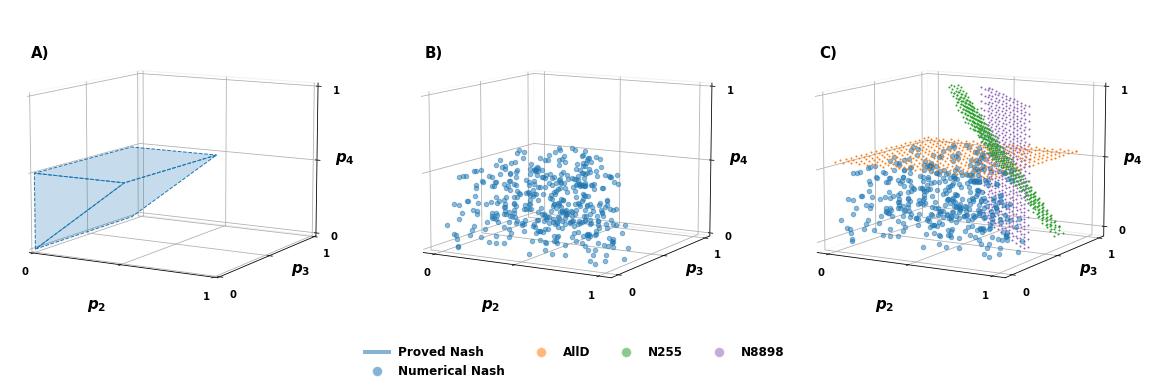

In [141]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
    
v = np.array([[0, 0, 0], [0, .9, 0], [0.51, 0.9, 0.5],  [0.51, 0, .5], [0, 0, .5], [0, 0.9, .5]])

verts = [[v[0], v[1], v[2], v[3]],
         [v[2], v[3], v[4], v[5]],
         [v[0], v[4], v[3]]]
            
ax1.add_collection3d(Poly3DCollection(verts, facecolors='tab:blue',
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='tab:blue', alpha=.25))
for i, row in eq[['p2', 'p5', 'p6']].round(2).drop_duplicates().iterrows():

        ax2.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)
        ax3.scatter(row['p2'], row['p5'], row['p6'], color='tab:blue', alpha=0.5)

ax2.set_zlim(0, 1);

    
for k, indices in enumerate([[Is0, Js0, Zs0], 
                             [Is255, Js255, Zs255],
                             [Is8897, Js8897, Zs8897]]):
    
        Is, Js, Zs = indices
        
        for i, j, z in zip(Is, Js, Zs):
            
            ax3.scatter(xv[i, j, z],
                            yv[i, j, z],
                            zv[i, j, z],
                            s=1,
                            color=colors[k])
            
        ax3.scatter(xv[i, j, z],
                yv[i, j, z],
                zv[i, j, z],
                s=1,
                color=colors[k])
        
for ax in axes:
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

ax1.set_title("A)", fontweight='bold', x=.1, y=.9, fontsize=15)
ax2.set_title("B)", fontweight='bold', x=.1, y=.9, fontsize=15)
ax3.set_title("C)", fontweight='bold', x=.1, y=.9, fontsize=15)
    
ax3.legend(custom_lines, ['Proved Nash',
                          'Numerical Nash',
                          'AllD', 'N255', 'N8898'], bbox_to_anchor=(0, 0), ncol=4, framealpha=0, fontsize=12);


plt.savefig("static/two_bit_reactive_numerical_results_prisoners_dilemma.pdf", bbox_inches='tight')